In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#202331016_Nanda Revan Saputro

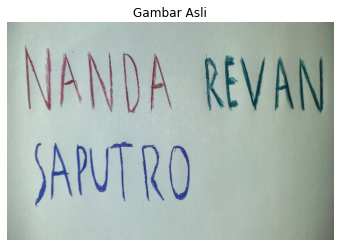

In [95]:
# Load gambar dan resize agar lebih kecil
image = cv2.imread('tulisan4.jpg')
resized_image = cv2.resize(image, (600, 400))

# Konversi ke RGB untuk visualisasi
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()

## Menampilkan Bagian Warna Merah

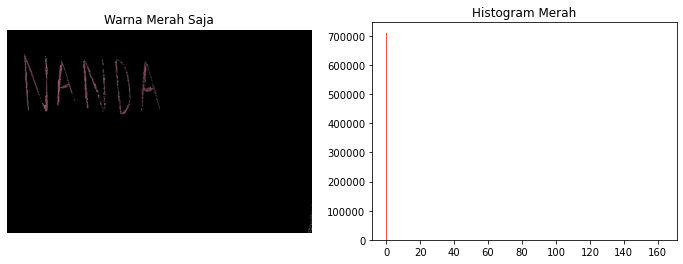

In [130]:
# Ambang batas warna merah (BGR)
lower_red = np.array([0, 0, 100])
upper_red = np.array([140, 105, 255])

mask_red = cv2.inRange(resized_image, lower_red, upper_red)
red_only = cv2.bitwise_and(resized_image, resized_image, mask=mask_red)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB))
plt.title("Warna Merah Saja")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(red_only.ravel(), bins=256, color='red', alpha=0.7)
plt.title("Histogram Merah")
plt.show()


## Menampilkan Bagian Warna Hijau

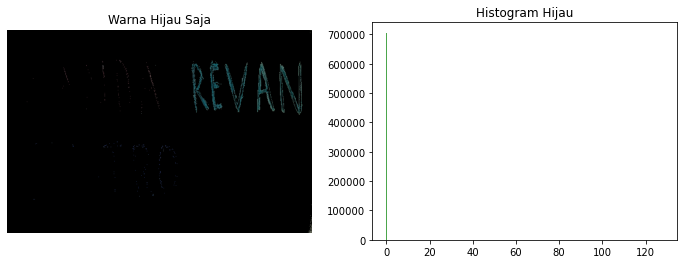

In [139]:
# Ambang hijau diperluas agar lebih sensitif
lower_green = np.array([0, 55, 0])
upper_green = np.array([120, 255, 100])

mask_green = cv2.inRange(resized_image, lower_green, upper_green)
green_only = cv2.bitwise_and(resized_image, resized_image, mask=mask_green)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(green_only, cv2.COLOR_BGR2RGB))
plt.title("Warna Hijau Saja")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(green_only.ravel(), bins=256, color='green', alpha=0.7)
plt.title("Histogram Hijau")
plt.show()


##  Menampilkan Bagian Warna Biru

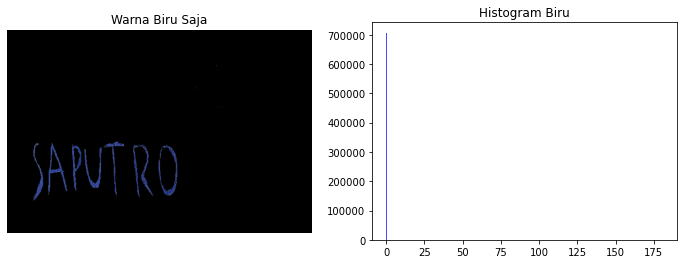

In [140]:
# Mask untuk warna biru
lower_blue = np.array([110, 0, 0])
upper_blue = np.array([255, 100, 100])

mask_blue = cv2.inRange(resized_image, lower_blue, upper_blue)
blue_only = cv2.bitwise_and(resized_image, resized_image, mask=mask_blue)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blue_only, cv2.COLOR_BGR2RGB))
plt.title("Warna Biru Saja")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(blue_only.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histogram Biru")
plt.show()
